In [50]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime

import pandas as pd
from download import download

mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False

print("Import Successful")

Import Successful


In [51]:
def parse(x):
    return datetime.strptime(x, "%m/%d/%Y")

In [52]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/electricity_consumption.csv',  parse_dates=['Bill_Date'], date_parser=parse)

C:\Users\thaku\AppData\Local\Temp\ipykernel_26016\3409800937.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/electricity_consumption.csv',  parse_dates=['Bill_Date'], date_parser=parse)


In [53]:
df.head()

,Bill_Date,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
0,2016-01-01,365,1423.5,219.0,247.73,31
1,2016-02-01,292,1138.8,175.2,234.11,31
2,2016-03-01,130,507.0,78.0,123.85,29
3,2016-04-01,117,456.3,70.2,111.22,29
4,2016-05-01,136,530.4,81.6,118.37,29


In [54]:

print("Rows     :", df.shape[0])
print("Columns  :", df.shape[1])
print("\n Features \n", df.columns.to_list())
print("\n Missing Values \n", df.isnull().any())
print("\n Unique Values \n", df.nunique())

Rows     : 53
Columns  : 6

 Features 
 ['Bill_Date', 'On_peak', 'Off_peak', 'Usage_charge', 'Billed_amount', 'Billing_days']

 Missing Values 
 Bill_Date        False
On_peak          False
Off_peak         False
Usage_charge     False
Billed_amount    False
Billing_days     False
dtype: bool

 Unique Values 
 Bill_Date        53
On_peak          51
Off_peak         53
Usage_charge     53
Billed_amount    52
Billing_days      9
dtype: int64


In [55]:

bill_df = df.set_index('Bill_Date')
     
bill_df.head(2)

,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
Bill_Date,,,,,
2016-01-01,365,1423.5,219.0,247.73,31
2016-02-01,292,1138.8,175.2,234.11,31


In [56]:
# data between 2016 and 2018
bill_2018 = bill_df['2016':'2018'][['Billed_amount']]

In [57]:
bill_2018.head()

,Billed_amount
Bill_Date,
2016-01-01,247.73
2016-02-01,234.11
2016-03-01,123.85
2016-04-01,111.22
2016-05-01,118.37


### simple moving average

Simple Moving Average

The Simple Moving Average (SMA) is calculated by adding the price of an instrument over a number of time periods and then dividing the sum by the number of time periods. The SMA is basically the average price of the given time period, with equal weighting given to the price of each period.

In financial applications a simple moving average (SMA) is the unweighted mean of the previous n data. However, in science and engineering, the mean is normally taken from an equal number of data on either side of a central value. This ensures that variations in the mean are aligned with the variations in the data rather than being shifted in time.

Mathmatically (t+(t-1)+(t-2)+...+(t-n))/n

Moving Average cant be a great tool when, the data is not stationary and fluctuating.

In [58]:
bill_2018['Billed_amount'].rolling(window = 3).mean()
# 3 means take the prev 2 months and also include the current month to get the avg

# need to shift result by 1 since 201.896667 example here would be taking the march + feb + jan and giving the number for april

Bill_Date
2016-01-01           NaN
2016-02-01           NaN
2016-03-01    201.896667
2016-04-01    156.393333
2016-05-01    117.813333
2016-06-01    102.466667
2016-07-01     94.283333
2016-08-01     95.626667
2016-09-01    144.230000
2016-10-01    166.186667
2016-11-01    175.566667
2016-12-01    182.483333
2017-01-01    219.516667
2017-02-01    240.776667
2017-03-01    209.833333
2017-04-01    161.550000
2017-05-01    141.170000
2017-06-01    161.350000
2017-07-01    215.483333
2017-08-01    243.746667
2017-09-01    267.820000
2017-10-01    231.653333
2017-11-01    189.500000
2017-12-01    145.206667
2018-01-01    176.750000
2018-02-01    206.696667
2018-03-01    223.860000
2018-04-01    185.040000
2018-05-01    172.280000
2018-06-01    177.896667
2018-07-01    222.270000
2018-08-01    264.630000
2018-09-01    277.363333
2018-10-01    291.766667
2018-11-01    259.546667
2018-12-01    224.340000
Name: Billed_amount, dtype: float64

In [59]:
bill_2018['ma_rolling_3'] = bill_2018['Billed_amount'].rolling(window = 3).mean().shift(1)

In [60]:
bill_2018
# not able to detect sudden jumps ex for : 2018-10-01

,Billed_amount,ma_rolling_3
Bill_Date,,
2016-01-01,247.73,NaN
2016-02-01,234.11,NaN
2016-03-01,123.85,NaN
2016-04-01,111.22,201.896667
2016-05-01,118.37,156.393333
2016-06-01,77.81,117.813333
2016-07-01,86.67,102.466667
2016-08-01,122.40,94.283333
2016-09-01,223.62,95.626667


<Axes: xlabel='Bill_Date'>

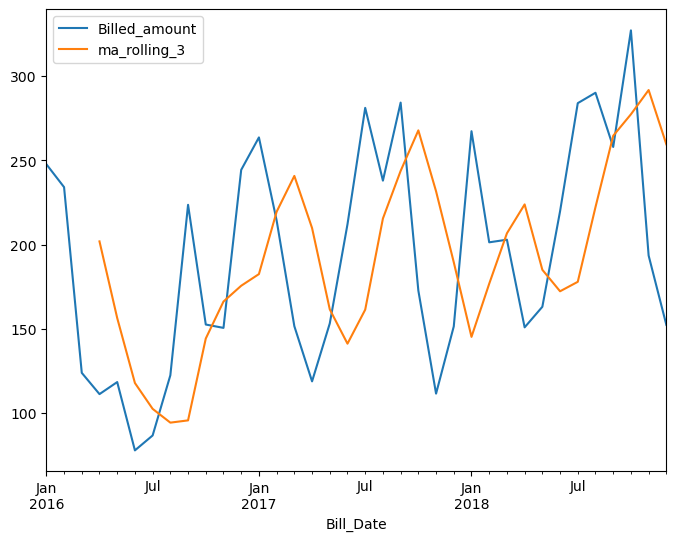

In [61]:
bill_2018.plot()

### weighted moving average

Weighted Moving Average:

Weighted moving averages can find trens sooner than SMA, on the other hand its complex as we need to assign the weights manually.
sometimes we would like to give more weightage to the latest points ex in a tiffen shop someone visited last week more likely to come again 
so we would assign more weightage to latest data points compared to older


can identify trends sooner than sma but on other hand weights assigned manually

In [62]:
def wma(x, weights):
    
    return (x*weights).mean()

In [63]:
bill_2018['Billed_amount'].rolling(window =3).apply(lambda x :wma(x, np.array([0.5,1,1.5])))

# data is date wise , first date (oldest one given 0.5  2md :1 and 3rd 1.5)

Bill_Date
2016-01-01           NaN
2016-02-01           NaN
2016-03-01    181.250000
2016-04-01    135.911667
2016-05-01    116.900000
2016-06-01     96.898333
2016-07-01     89.000000
2016-08-01    103.058333
2016-09-01    167.055000
2016-10-01    171.210000
2016-11-01    163.386667
2016-12-01    197.788333
2017-01-01    238.366667
2017-02-01    235.768333
2017-03-01    191.150000
2017-04-01    145.628333
2017-05-01    141.443333
2017-06-01    176.898333
2017-07-01    236.818333
2017-08-01    248.061667
2017-09-01    268.338333
2017-10-01    220.773333
2017-11-01    160.701667
2017-12-01    141.661667
2018-01-01    202.718333
2018-02-01    215.018333
2018-03-01    213.125000
2018-04-01    176.625000
2018-05-01    165.640000
2018-06-01    189.380000
2018-07-01    242.421667
2018-08-01    276.361667
2018-09-01    273.026667
2018-10-01    297.940000
2018-11-01    248.801667
2018-12-01    195.198333
Name: Billed_amount, dtype: float64

In [64]:
bill_2018['wma_rolling_3'] = bill_2018['Billed_amount'].rolling(window = 3).apply(lambda x : wma(x, np.array([0.1,1,1.5]))).shift(1)

In [65]:
bill_2018

,Billed_amount,ma_rolling_3,wma_rolling_3
Bill_Date,,,
2016-01-01,247.73,NaN,NaN
2016-02-01,234.11,NaN,NaN
2016-03-01,123.85,NaN,NaN
2016-04-01,111.22,201.896667,148.219333
2016-05-01,118.37,156.393333,104.697000
2016-06-01,77.81,117.813333,100.386667
2016-07-01,86.67,102.466667,82.069000
2016-08-01,122.40,94.283333,73.217333
2016-09-01,223.62,95.626667,92.683667


### exponential moving avg

In [66]:
bill_2018['ewm_window_3']=  bill_2018['Billed_amount'].ewm(span = 3, adjust = False, min_periods = 0).mean().shift(1)

In [67]:
bill_2018

,Billed_amount,ma_rolling_3,wma_rolling_3,ewm_window_3
Bill_Date,,,,
2016-01-01,247.73,NaN,NaN,NaN
2016-02-01,234.11,NaN,NaN,247.730000
2016-03-01,123.85,NaN,NaN,240.920000
2016-04-01,111.22,201.896667,148.219333,182.385000
2016-05-01,118.37,156.393333,104.697000,146.802500
2016-06-01,77.81,117.813333,100.386667,132.586250
2016-07-01,86.67,102.466667,82.069000,105.198125
2016-08-01,122.40,94.283333,73.217333,95.934063
2016-09-01,223.62,95.626667,92.683667,109.167031


In [68]:
bill_2018['esm_window_3_7']  = bill_2018['Billed_amount'].ewm(alpha = 0.7, adjust = False, min_periods = 3).mean().shift(1)

<Axes: xlabel='Bill_Date'>

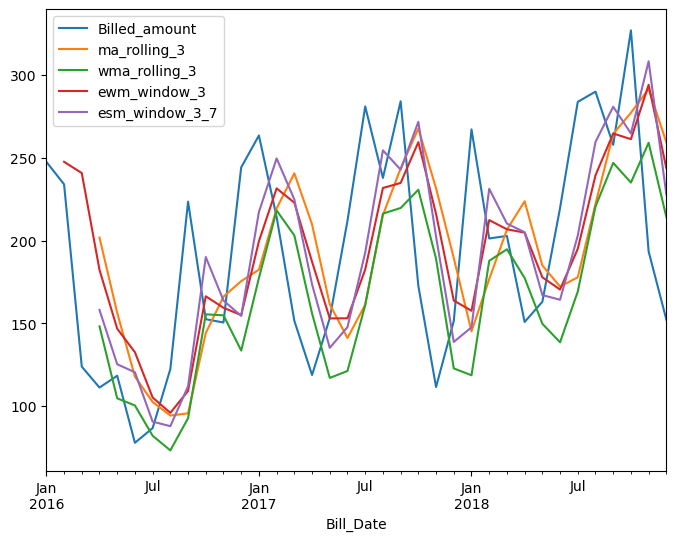

In [69]:
bill_2018.plot()

In [70]:

bill_2018['esm_window_3_3'] = bill_2018['Billed_amount'].ewm(alpha = 0.3 , adjust = False ,min_periods = 3).mean().shift(1)

<Axes: xlabel='Bill_Date'>

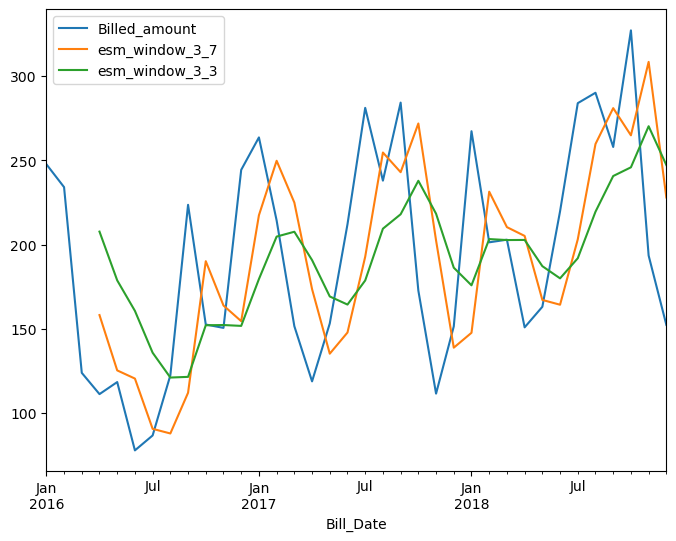

In [71]:
bill_2018[['Billed_amount','esm_window_3_7','esm_window_3_3']].plot()

### EVALUATION

rmse

In [72]:

((bill_2018['Billed_amount']-bill_2018['ma_rolling_3'])**2).mean()**0.5

70.98561687433802

In [73]:

((bill_2018['Billed_amount']-bill_2018['wma_rolling_3'])**2).mean()**0.5

67.16327198228957

In [74]:

((bill_2018['Billed_amount']-bill_2018['ewm_window_3'])**2).mean()**0.5

64.32131239414655

In [77]:

((bill_2018['Billed_amount']-bill_2018['esm_window_3_7'])**2).mean()**0.5

61.26408398853503

In [79]:

((bill_2018['Billed_amount']-bill_2018['esm_window_3_3'])**2).mean()**0.5

65.22424423118377